# Importing Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

from regression_analysis.fit_model import linear_regression
from regression_analysis.utils import franke
from regression_analysis.utils.plots import triangulation_for_triheatmap as triheatmap
from regression_analysis.fit_model.apply_linear_regression import plot_stat, plot_stat_sgd, apply_regression, apply_regression_sgd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.tri import Triangulation
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from matplotlib import cm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model

import ipywidgets as widget
from ipywidgets import interact, interactive, fixed, interact_manual

import glob as glob
from IPython.display import Image, display, HTML, Video

import multiprocessing as mp

import os
if not os.path.exists('data_linear_regression'):
    os.makedirs('data_linear_regression')
if not os.path.exists('data_linear_regression_sgd'):
    os.makedirs('data_linear_regression_sgd')

In [3]:
# Needed for parallelization later
print("Number of processors: ", mp.cpu_count())

Number of processors:  8


# Demo for applying regression to Franke data 

## Visualisation of Franke Data

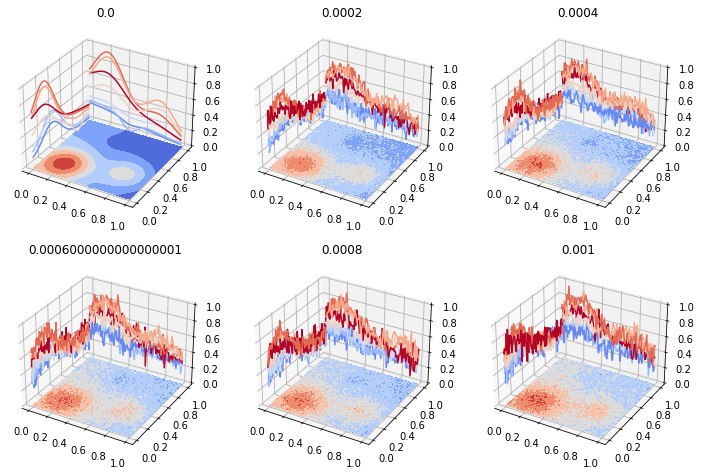

In [4]:
n = 100 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)

noise_var = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
noise_var = np.arange(0,6)*0.0002

fig, ax = plt.subplots(2, 3,subplot_kw={"projection": "3d"}, figsize=(12,8))
for ind, var in enumerate(noise_var):
    y = franke.Franke(xx1, xx2, noise_var=np.sqrt(var)) #zero mean gaussian noise
    xx1 = xx1.reshape([n,n])
    xx2 = xx2.reshape([n,n])

    y = y.reshape(n,n)
    #rescaling y
    y = (y-np.amin(y))/(np.amax(y)-np.amin(y))
    
    if(ind<3): a = 0 
    else: a = 1

    #ax[a, ind%3].plot_surface(xx1, xx2, y, rstride=8, cstride=8, alpha=0.2, cmap=cm.coolwarm)
    ax[a, ind%3].title.set_text(str(var))
    cset = ax[a, ind%3].contourf(xx1, xx2, y, zdir='z', offset=0, cmap=cm.coolwarm)
    cset = ax[a, ind%3].contour(xx1, xx2, y, zdir='x', offset=0, cmap=cm.coolwarm_r)
    cset = ax[a, ind%3].contour(xx1, xx2, y, zdir='y', offset=1, cmap=cm.coolwarm_r)


In [3]:
n = 100 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)

y = franke.Franke(xx1, xx2, noise_var=0.0) #zero mean gaussian noise has variance = var
print(np.max(y))

1.2195347797082343


In [4]:
#create linear regression object by passing input and output data
linear_reg = linear_regression.linear_regression2D(xx1, xx2, y) 

## Apply OLS 

In [5]:
print("own OLS")
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

print('\n'+ "Scikit OLS")
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="scikit_ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

own OLS
Train MSE 0.0014315378609226174
Test MSE 0.001146904316007783
Train R2 0.9743897443285086
Test R2 0.9778844502816659
Train bias 0.05589705465206113
Test bias 0.051866099916942014
Train model variance 0.054465516788993244
Test model variance 0.052533917682456334

Scikit OLS
Train MSE 0.001399893435863234
Test MSE 0.0014317939883548832
Train R2 0.974662828360469
Test R2 0.9751532495509305
Train bias 0.05525058028494085
Test bias 0.05762578612902556
Train model variance 0.05385068684907898
Test model variance 0.05510485034825425


In [6]:
linear_reg.apply_leastsquares_bootstrap(order=5, test_ratio=0.1, n_boots=30, reg_method="ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.0013923439730719196
Test MSE 0.0014268410392499957
Train R2 0.9748131730949406
Test R2 0.9743388006719232
Train bias 0.05712902034615127
Test bias 0.05753024980678943
Train model variance 0.055690013258889205
Test model variance 0.05603923933975953


## Apply OLS with cross validation sampling

In [7]:
linear_reg.apply_leastsquares_crossvalidation(order=5, kfolds=10, reg_method="ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.001402214692532389
Test MSE 0.0014085433301206554
Train R2 0.9747316032316593
Test R2 0.9744605953791732
Train bias 0.005625327734845175
Test bias 0.004864263812675437
Train model variance 0.005485610179965326
Test model variance 0.004798420334117806


## Apply Ridge regression 

In [8]:
print("own ridge")
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="ridge", lmbda=0.9)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

print('\n'+"scikit ridge")
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="scikit_ridge", lmbda=0.9)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

own ridge
Train MSE 0.005645842602311908
Test MSE 0.005858756280193477
Train R2 0.8974437046616717
Test R2 0.9013792344324465
Train bias 0.05505116320842965
Test bias 0.059408558205137255
Train model variance 0.04744486737106172
Test model variance 0.051949014647433005

scikit ridge
Train MSE 0.005640374249617838
Test MSE 0.006089762069647348
Train R2 0.8981461835011143
Test R2 0.8923215383141608
Train bias 0.05537715902987056
Test bias 0.05656646625061504
Train model variance 0.047812272295902486
Test model variance 0.047531258160739255


## Apply Ridge regression with bootstrap

In [9]:
linear_reg.apply_leastsquares_bootstrap(order=5, test_ratio=0.1, n_boots=30, reg_method="ridge", lmbda=0.9)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.005681618690677311
Test MSE 0.005704325899161004
Train R2 0.8977681072876926
Test R2 0.897362709450519
Train bias 0.057422852193160574
Test bias 0.05746212792023058
Train model variance 0.04953835987437372
Test model variance 0.049552357131788044


## Apply Ridge regression with cross validation

In [10]:
linear_reg.apply_leastsquares_crossvalidation(order=5, kfolds=10, reg_method="ridge", lmbda=0.1)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.003587352408226471
Test MSE 0.003599872334739232
Train R2 0.9353575568181884
Test R2 0.9350153642432717
Train bias 0.005564117476790335
Test bias 0.005419981970152453
Train model variance 0.005011375572516438
Test model variance 0.004949380692700832


## Apply Lasso regression (utilises scikit learn)

In [11]:
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="scikit_lasso", lmbda=0.001)

print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)


Train MSE 0.009256854773192463
Test MSE 0.008999053959781882
Train R2 0.8341321073038298
Test R2 0.8291186523537881
Train bias 0.05580958212499437
Test bias 0.05266383511240413
Train model variance 0.04052579876935987
Test model variance 0.038035797684885395


# Widgets to display results for various parameter combinations

polynomial order: The order of 2D polynomial used for fitting

noise_var = The variance of the gaussian noise added to the Franke data

ratio: The testing ratio. For example, if ratio is 0.1 then the test set comprises of 10 percent of the dataset.

num: The number of points taken along each direction of the input vector. If num = 20, then the total number of data points is 20*20 = 400

stat: Displays the chosen statistic

    * training MSE
    * testing MSE
    * training R2 error
    * testing R2 error
    * bias in test data
    * variance in test prediction

method: To choose the regression type

    - Direct solution and stochastic gradient descent solution available
    
        * OLS
        * OLS with bootstrap resampling
        * OLS with crossvalidation resampling
        * Ridge
        * Ridge with bootstrap resampling
        * Ridge with crossvalidation resampling
        
    - Direct Solution only (using scikit learn)
    
        * Lasso
        * Lasso with bootstrap resampling
        * Lasso with crossvalidation resampling

n-boot = number of times bootstrap sampling is performed in the bootstrap method. Changing this for methods that doesn't involve bootstrap sampling will not have any effect

k_fold = number of folds in the cross validation method. Changing this for methods that doesn't involve cross validation will not have any effect

ridge_lambda = Regularisation parameter for ridge regression

lasso_lambda = Regularisation parameter for LASSO regression

learn_rates = Parameter that controls the descent jump size in gradient descent methods

epoch = Parameter that controls the number of times the algorithm works though the entire dataset in gradient descent methods

number of batches = Parameter that controls the batch size in gradient descent methods
    

## Without Stochastic Gradient Descent

In [5]:
#load data
order = np.load("data_linear_regression/order.npy")
num_points = np.load("data_linear_regression/num_points.npy")
noise_var = np.load("data_linear_regression/noise_var.npy")
test_ratio = np.load("data_linear_regression/test_ratio.npy")
k_folds = np.load("data_linear_regression/k_folds.npy")
n_boots = np.load("data_linear_regression/n_boots.npy")
ridge_lambda = np.load("data_linear_regression/ridge_lambda.npy")
lasso_lambda = np.load("data_linear_regression/lasso_lambda.npy")

In [6]:
methods = ["ols", "ols_bootstrap", "ols_crossvalidation", "ridge", 
           "ridge_bootstrap", "ridge_crossvalidation", "lasso", "lasso_bootstrap",
           "lasso_crossvalidation"]
stats = ["train MSE", "test MSE", "test R2", "train R2", "test bias", "test variance"]

widget.interact(plot_stat, ratio=test_ratio.tolist(), num=num_points.tolist(), stat=stats, 
                method=methods, k_fold=k_folds.tolist(), n_boot=n_boots.tolist(),
                ridge_lmb=ridge_lambda.tolist(), lasso_lmb=lasso_lambda.tolist())

interactive(children=(Dropdown(description='ratio', options=(0.1, 0.2, 0.3, 0.4), value=0.1), Dropdown(descrip…

<function regression_analysis.fit_model.apply_linear_regression.plot_stat(ratio=0.1, num=100, stat='test MSE', method='ols', n_boot=1000, k_fold=1000, ridge_lmb=122.0, lasso_lmb=112.2)>

## With Stochastic Gradient Descent

In [7]:
# load data
order = np.load("data_linear_regression_sgd/order.npy")
num_points = np.load("data_linear_regression_sgd/num_points.npy")
noise_var = np.load("data_linear_regression_sgd/noise_var.npy")
test_ratio = np.load("data_linear_regression_sgd/test_ratio.npy")
k_folds = np.load("data_linear_regression_sgd/k_folds.npy")
n_boots = np.load("data_linear_regression_sgd/n_boots.npy")
ridge_lambda = np.load("data_linear_regression_sgd/ridge_lambda.npy")
lasso_lambda = np.load("data_linear_regression_sgd/lasso_lambda.npy")
learn_rates= np.load("data_linear_regression_sgd/learn_rates.npy")
num_min_batches= np.load("data_linear_regression_sgd/num_min_batches.npy")
epochs = np.load("data_linear_regression_sgd/epochs.npy")

In [8]:
methods = [ "ols_sgd", "ols_bootstrap_sgd", "ols_crossvalidation_sgd", "ridge_sgd", "ridge_bootstrap_sgd",
            "ridge_crossvalidation_sgd"]
stats = ["train MSE", "test MSE", "test R2", "train R2", "test bias", "test variance"]

widget.interact(plot_stat_sgd, ratio=test_ratio.tolist(), num=num_points.tolist(), stat=stats, 
                method=methods, k_fold=k_folds.tolist(), n_boot=n_boots.tolist(),
                ridge_lmb=ridge_lambda.tolist(), lasso_lmb=lasso_lambda.tolist(), 
                learn_rate=learn_rates.tolist(), batch=num_min_batches.tolist(), 
                epoch=epochs.tolist())

interactive(children=(Dropdown(description='ratio', options=(0.1, 0.2, 0.3), value=0.1), Dropdown(description=…

<function regression_analysis.fit_model.apply_linear_regression.plot_stat_sgd(ratio=0.1, num=100, stat='test MSE', method='ols', n_boot=1000, k_fold=1000, ridge_lmb=122.0, lasso_lmb=112.2, learn_rate=0.1, batch=5, epoch=50)>

# Edge cases study of OLS

## Worst case study
What is the lowest possible MSE that we can get for data normalised to the range [0,1] such that the polynomial fitted is the best polynomial fit?
This will happen when half of the data is 0 and the other half is 1, and if we fit a polynomial of order p such that p<<n where n is the number of data points. Then we will end up fitting a constant which is 0.5. What is MSE in this case?

In [9]:
n = 1000 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)
y = np.zeros(xx1.shape)
y[::2, :]+=1.0
print("mean of the output is ", np.mean(y))

print("fitting a constant")
linear_reg = linear_regression.linear_regression2D(xx1, xx2, y) 
linear_reg.apply_leastsquares(order=0, test_ratio=0.1, reg_method="ols")

print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Test bias", linear_reg.testbias)
print("Test model variance", linear_reg.testvar)

print("fitting a 10th order polynomial")
linear_reg.apply_leastsquares(order=10, test_ratio=0.1, reg_method="ols")

print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Test bias", linear_reg.testbias)
print("Test model variance", linear_reg.testvar)

print("The worst possible MSE for data normalised to range [0,1] is ", 
      linear_reg.testMSE, "and is almost independent of the order of the polynomial used to fit such that the order of polynomial is much less than the number of data points")

mean of the output is  0.5
fitting a constant
Train MSE 0.24999997945555558
Test MSE 0.25000039034444466
Train R2 -2.220446049250313e-16
Test R2 -8.217832479617826e-06
Test bias 0.25000039034444443
Test model variance 4.930380657631324e-32
fitting a 10th order polynomial
Train MSE 0.2499850967951986
Test MSE 0.25001597682331467
Train R2 5.946842779280814e-05
Test R2 -7.560457756028427e-05
Test bias 0.2500007034197615
Test model variance 1.5161495592950492e-05
The worst possible MSE for data normalised to range [0,1] is  0.25001597682331467 and is almost independent of the order of the polynomial used to fit such that the order of polynomial is much less than the number of data points


## Fitting uniform random numbers
What will happen if we use OLS to fit data which is essentially a random uniform number between 0 and 1 irrespective of the value of the dependent variables. What is the MSE in this situation?

In [10]:
n = 1000 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)
y = np.random.uniform(size=xx1.shape)
print("mean of the output is ", np.mean(y))

print("fitting a constant")
linear_reg = linear_regression.linear_regression2D(xx1, xx2, y) 
linear_reg.apply_leastsquares(order=0, test_ratio=0.1, reg_method="ols")

print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Test bias", linear_reg.testbias)
print("Test model variance", linear_reg.testvar)

print("fitting a 10th order polynomial")
linear_reg.apply_leastsquares(order=10, test_ratio=0.1, reg_method="ols")

print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Test bias", linear_reg.testbias)
print("Test model variance", linear_reg.testvar)

mean of the output is  0.49978607727778634
fitting a constant
Train MSE 0.0832655097108108
Test MSE 0.08327085848269622
Train R2 0.0
Test R2 -7.364200145243416e-06
Test bias 0.08327085848269622
Test model variance 1.1093356479670479e-31
fitting a 10th order polynomial
Train MSE 0.08329262983002073
Test MSE 0.08298314606081367
Train R2 6.373448297614104e-05
Test R2 -5.1651273969000044e-05
Test bias 0.08297895083118705
Test model variance 5.3961492524665985e-06


## Fitting gaussian data
What will happen if we use OLS to fit data which is essentially a truncated gaussian number between 0 and 1 where the output is independent of the dependant variables. What is the MSE in this situation?

In [11]:
n = 500 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)

var = np.linspace(0.025, 1.0, 21)
MSE = np.zeros(len(var))
MSE_full = np.zeros(len(var))
max_gauss = np.zeros(len(var))


for ind, variance in enumerate(var):
    print()
    print("truncated")
    y = np.random.normal(loc=0.5, scale = np.sqrt(variance), size=xx1.shape)
    y[np.where(y>1.0)] = 1.0
    y[np.where(y<0.0)] = 0.0

    print("mean of the output is ", np.mean(y))
    print("variance of the output is ", np.var(y))

    print("fitting a constant")
    linear_reg = linear_regression.linear_regression2D(xx1, xx2, y) 
    linear_reg.apply_leastsquares(order=0, test_ratio=0.1, reg_method="ols")

    """
    print("Train MSE", linear_reg.trainMSE)
    print("Test MSE", linear_reg.testMSE)
    print("Train R2", linear_reg.trainR2)
    print("Test R2", linear_reg.testR2)
    print("Test bias", linear_reg.testbias)
    print("Test model variance", linear_reg.testvar)
    """

    print("fitting a 10th order polynomial")
    linear_reg.apply_leastsquares(order=10, test_ratio=0.1, reg_method="ols")
    
    """
    print("Train MSE", linear_reg.trainMSE)
    print("Test MSE", linear_reg.testMSE)
    print("Train R2", linear_reg.trainR2)
    print("Test R2", linear_reg.testR2)
    print("Test bias", linear_reg.testbias)
    print("Test model variance", linear_reg.testvar)
    """
    
    MSE[ind] = linear_reg.testMSE
    print()
    print("non truncated")
    
    y = np.random.normal(loc=0.5, scale = np.sqrt(variance), size=xx1.shape)
    max_gauss[ind] = np.amax(y)
    print("mean of the output is ", np.mean(y))
    print("variance of the output is ", np.var(y))

    print("fitting a constant")
    linear_reg = linear_regression.linear_regression2D(xx1, xx2, y) 
    linear_reg.apply_leastsquares(order=0, test_ratio=0.1, reg_method="ols")


    """
    print("Train MSE", linear_reg.trainMSE)
    print("Test MSE", linear_reg.testMSE)
    print("Train R2", linear_reg.trainR2)
    print("Test R2", linear_reg.testR2)
    print("Test bias", linear_reg.testbias)
    print("Test model variance", linear_reg.testvar)
    """
    print("fitting a 10th order polynomial")
    linear_reg.apply_leastsquares(order=10, test_ratio=0.1, reg_method="ols")
    """
    print("Train MSE", linear_reg.trainMSE)
    print("Test MSE", linear_reg.testMSE)
    print("Train R2", linear_reg.trainR2)
    print("Test R2", linear_reg.testR2)
    print("Test bias", linear_reg.testbias)
    print("Test model variance", linear_reg.testvar)
    """
    MSE_full[ind] = linear_reg.testMSE



truncated
mean of the output is  0.4996984441075381
variance of the output is  0.024901712440360015
fitting a constant
fitting a 10th order polynomial

non truncated
mean of the output is  0.49975077841244164
variance of the output is  0.024989109783391188
fitting a constant
fitting a 10th order polynomial

truncated
mean of the output is  0.49967727172327664
variance of the output is  0.06548027990743277
fitting a constant
fitting a 10th order polynomial

non truncated
mean of the output is  0.5005932146193507
variance of the output is  0.07397796567804107
fitting a constant
fitting a 10th order polynomial

truncated
mean of the output is  0.5001778145158565
variance of the output is  0.09178729641216922
fitting a constant
fitting a 10th order polynomial

non truncated
mean of the output is  0.5002004448358836
variance of the output is  0.12208553768265078
fitting a constant
fitting a 10th order polynomial

truncated
mean of the output is  0.4999933058242343
variance of the output is

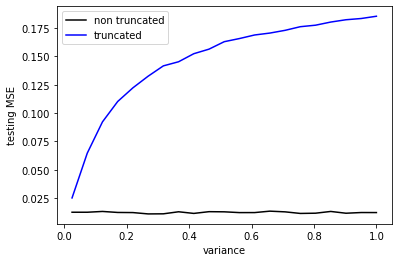

In [12]:
plt.plot(var, MSE_full, 'k', label="non truncated")
plt.plot(var, MSE, 'b', label = "truncated")
plt.xlabel("variance")
plt.ylabel("testing MSE")
plt.legend()


In [13]:
var = np.linspace(0.025, 1.0)
max_gauss = np.zeros(len(var))
true_var = np.zeros(len(var))
true_var_trunc = np.zeros(len(var))

for ind, variance in enumerate(var):   
    y = np.random.normal(loc=0.5, scale = np.sqrt(variance), size=10000)
    max_gauss[ind] = np.amax(y)
    true_var[ind] = np.var(y)
    #truncating
    y[np.where(y>1.0)] = 1.0
    y[np.where(y<0.0)] = 0.0
    true_var_trunc[ind] = np.var(y)

Text(0, 0.5, 'Max sample')

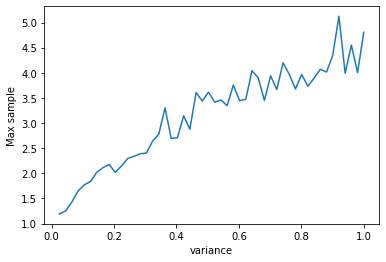

In [14]:
plt.plot(var, max_gauss)
plt.xlabel("variance")
plt.ylabel("Max sample")

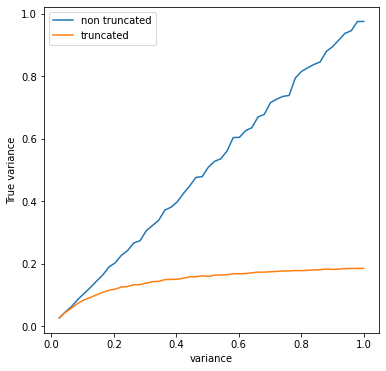

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(var, true_var, label = "non truncated")
ax.plot(var, true_var_trunc, label = "truncated")
ax.set_xlabel("variance")
ax.set_ylabel("True variance")
ax.legend()

## Franke with and without truncated gaussian

In [18]:
n = 500 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)

var = np.linspace(0.01, 0.1, 21)
MSE = np.zeros(len(var))
MSE_full = np.zeros(len(var))
max_gauss = np.zeros(len(var))


for ind, variance in enumerate(var):
    print()
    print("truncated")
    y = np.random.normal(loc=0.5, scale = np.sqrt(variance), size=xx1.shape)
    y[np.where(y>1.0)] = 1.0
    y[np.where(y<0.0)] = 0.0
    y+=franke.Franke(xx1, xx2, noise_var=0.0)
    
    print("mean of the output is ", np.mean(y))
    print("variance of the output is ", np.var(y))

    print("fitting a constant")
    linear_reg = linear_regression.linear_regression2D(xx1, xx2, y) 
    linear_reg.apply_leastsquares(order=0, test_ratio=0.1, reg_method="ols")

    """
    print("Train MSE", linear_reg.trainMSE)
    print("Test MSE", linear_reg.testMSE)
    print("Train R2", linear_reg.trainR2)
    print("Test R2", linear_reg.testR2)
    print("Test bias", linear_reg.testbias)
    print("Test model variance", linear_reg.testvar)
    """

    print("fitting a 10th order polynomial")
    linear_reg.apply_leastsquares(order=10, test_ratio=0.1, reg_method="ols")
    
    """
    print("Train MSE", linear_reg.trainMSE)
    print("Test MSE", linear_reg.testMSE)
    print("Train R2", linear_reg.trainR2)
    print("Test R2", linear_reg.testR2)
    print("Test bias", linear_reg.testbias)
    print("Test model variance", linear_reg.testvar)
    """
    
    MSE[ind] = linear_reg.testMSE
    print()
    print("non truncated")
    
    y = np.random.normal(loc=0.5, scale = np.sqrt(variance), size=xx1.shape)
    y+=franke.Franke(xx1, xx2, noise_var=0.0)
    max_gauss[ind] = np.amax(y)
    print("mean of the output is ", np.mean(y))
    print("variance of the output is ", np.var(y))

    print("fitting a constant")
    linear_reg = linear_regression.linear_regression2D(xx1, xx2, y) 
    linear_reg.apply_leastsquares(order=0, test_ratio=0.1, reg_method="ols")


    """
    print("Train MSE", linear_reg.trainMSE)
    print("Test MSE", linear_reg.testMSE)
    print("Train R2", linear_reg.trainR2)
    print("Test R2", linear_reg.testR2)
    print("Test bias", linear_reg.testbias)
    print("Test model variance", linear_reg.testvar)
    """
    print("fitting a 10th order polynomial")
    linear_reg.apply_leastsquares(order=10, test_ratio=0.1, reg_method="ols")
    """
    print("Train MSE", linear_reg.trainMSE)
    print("Test MSE", linear_reg.testMSE)
    print("Train R2", linear_reg.trainR2)
    print("Test R2", linear_reg.testR2)
    print("Test bias", linear_reg.testbias)
    print("Test model variance", linear_reg.testvar)
    """
    MSE_full[ind] = linear_reg.testMSE



truncated
mean of the output is  0.906795538157242
variance of the output is  0.09257718145360916
fitting a constant
fitting a 10th order polynomial

non truncated
mean of the output is  0.9066617459733353
variance of the output is  0.09232403252592684
fitting a constant
fitting a 10th order polynomial

truncated
mean of the output is  0.90657756857955
variance of the output is  0.09727263890407667
fitting a constant
fitting a 10th order polynomial

non truncated
mean of the output is  0.9067766700537548
variance of the output is  0.09690806205721585
fitting a constant
fitting a 10th order polynomial

truncated
mean of the output is  0.9064207683180685
variance of the output is  0.10139629207059755
fitting a constant
fitting a 10th order polynomial

non truncated
mean of the output is  0.906541574344457
variance of the output is  0.10133482967426076
fitting a constant
fitting a 10th order polynomial

truncated
mean of the output is  0.9064870945879331
variance of the output is  0.1058

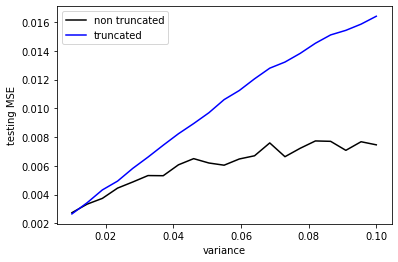

In [19]:
plt.plot(var, MSE_full, 'k', label="non truncated")
plt.plot(var, MSE, 'b', label = "truncated")
plt.xlabel("variance")
plt.ylabel("testing MSE")
plt.legend()


# generate data for widgets to display for your own set of parameters
Note: This will overwrite the existent data and will take a long time to run. We do not recommend running it unless you are extremely curious about the parameters we didn't cover

## Without SGD

Perform
* Ordinary Least Squares(OLS) with scikit-learn test train split, own bootstrap, own cross-validation
* Ridge Regression(RR) with scikit-learn test train split, own bootstrap, own cross-validation
* Scikit Lasso Regression(LR) with scikit-learn test train split, own bootstrap, own cross-validation
* Scikit OLS with scikit-learn test train split. Note: this is just for comparing OLS to Scikit-OLS
* Scikit RR with scikit-learn test train split. Note: this is just for comparing OLS to Scikit-OLS

and save output.

## with SGD